# Dataset Information

In [19]:
# Import Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [20]:
# Import Dataset
umkm = pd.read_csv(r'C:\Users\USER\Documents\Dataset for Practice\data.jabarprov.go.id\diskuk-od_17371_jml_ush_mikro_kecil_menengah_umkm__kabupatenkota_kateg_data.csv')
umkm

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,927,UNIT,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,927,UNIT,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,132,UNIT,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,33111,UNIT,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,32316,UNIT,2017
...,...,...,...,...,...,...,...,...,...
1345,1346,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,1732,UNIT,2021
1346,1347,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,12510,UNIT,2021
1347,1348,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,9150,UNIT,2021
1348,1349,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,1698,UNIT,2021


In [21]:
# Mengetahui informasi tipe data pada setiap fitur
umkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1350 non-null   int64 
 1   kode_provinsi        1350 non-null   int64 
 2   nama_provinsi        1350 non-null   object
 3   kode_kabupaten_kota  1350 non-null   int64 
 4   nama_kabupaten_kota  1350 non-null   object
 5   kategori_usaha       1350 non-null   object
 6   jumlah_umkm          1350 non-null   int64 
 7   satuan               1350 non-null   object
 8   tahun                1350 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 95.0+ KB


Fitur id, kode provinsi, kode kabupaten kota, jumlah umkm, dan tahun merupakan tipe data numerik, yaitu INTEGER
Fitur nama provinsi, nama kabupaten kota, kategori usaha, dan unit merupakan tipe data kategorik
Dataset juga memiliki 1350 row

Dataset di atas diambil dari Provinsi Jawa Barat sehingga fitur kode provinsi dan nama provinsi sama untuk setiap bari, tetapi mari kita pastikan apakah ada yang berbeda

In [22]:
# Memastikan bahwa tidak ada provinsi lain selain jawa barat
umkm['nama_provinsi'].value_counts()

JAWA BARAT    1350
Name: nama_provinsi, dtype: int64

Pada kolom nama provinsi, terdapat 1350 data untuk nama Jawa Barat. Oleh karenanya, nama dan kode provinsi sudah pasti Jawa Barat  

In [23]:
# Mengetahui apakah terdapat baris yang kosong
umkm.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
kategori_usaha         0
jumlah_umkm            0
satuan                 0
tahun                  0
dtype: int64

Dapat dilihat, bahwa setiap baris pada dataset terisi atau tidak ada yang kosong

Oleh karena itu, mari kita lihat insight apa yang dapat kita ambil dari dataset ini

# Exploration and Visualization Data

In [24]:
# Mengetahui berapa jenis kategori usaha pada seluruh umkm di Jawa Barat
kategori = umkm['kategori_usaha'].unique().shape[0]
print('Banyaknya kategori usaha UMKM di Jawa Barat adalah',kategori)

Banyaknya kategori usaha UMKM di Jawa Barat adalah 10


In [25]:
# Mengetahui berapa banyak kabupaten kota di Jawa Barat
kabupaten_kota = umkm['nama_kabupaten_kota'].unique().shape[0]
print('Banyaknya kabupaten kota di Jawa Barat adalah',kabupaten_kota)

Banyaknya kabupaten kota di Jawa Barat adalah 27


Mari kita lihat berapa banyak UMKM yang ada di Jawa Barat dari tahun 2017 - 2021

In [26]:
# Mengatahui tahun yang ada di dataset
tahun = umkm['tahun'].unique()

# List untuk menyimpan banyaknya UMKM pada masing-masing tahun
banyak_umkm_jawa_barat = []

# Looping untuk mengetahui banyaknya UMKM pada masing-masing tahun dan nilainya di input ke list banyak_umkm
for t in tahun:
    jawa_barat = umkm.loc[umkm['tahun']==t]
    jumlah_jawa_barat = jawa_barat['jumlah_umkm'].sum()
    banyak_umkm_jawa_barat.append(jumlah_jawa_barat)

# Menampilkan hasil dalam bentuk tabel
table_jawa_barat = {'Tahun':tahun,
                    'Banyak UMKM': ['{:,}'.format(i) for i in banyak_umkm_jawa_barat]}
print(tabulate(table_jawa_barat, headers='keys', tablefmt='fancy_grid'))

╒═════════╤═══════════════╕
│   Tahun │ Banyak UMKM   │
╞═════════╪═══════════════╡
│    2017 │ 4,921,572     │
├─────────┼───────────────┤
│    2018 │ 5,226,081     │
├─────────┼───────────────┤
│    2019 │ 5,549,426     │
├─────────┼───────────────┤
│    2020 │ 5,892,787     │
├─────────┼───────────────┤
│    2021 │ 6,257,378     │
╘═════════╧═══════════════╛


In [27]:
# Persentasi pertumbuhan UMKM di Jawa Barat dari tahun 2017-2021
persen_jawa_barat = (banyak_umkm_jawa_barat[4]-banyak_umkm_jawa_barat[0])/banyak_umkm_jawa_barat[0] * 100
print('Pertumbuhan UMKM di Jawa Barat adalah','{:.2f}'.format(persen_jawa_barat),'%')

Pertumbuhan UMKM di Jawa Barat adalah 27.14 %


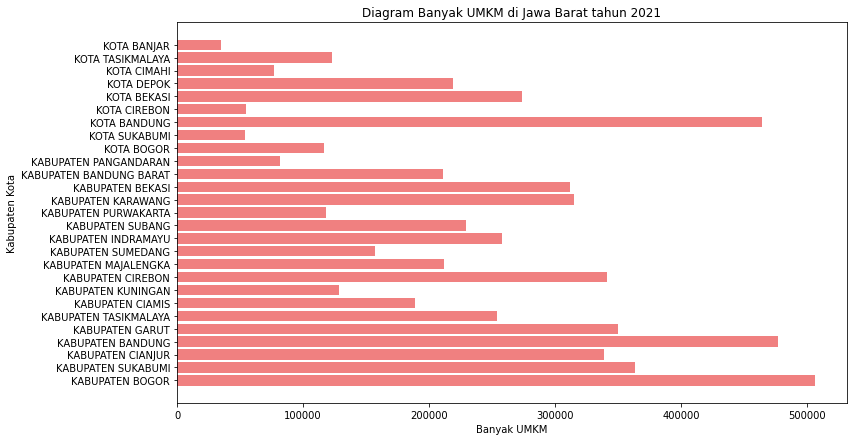

In [28]:
# Perbandingan banyak UMKM berdasarkan kabupaten/kota pada tahun 2021
umkm_2021 = umkm.loc[umkm['tahun']==2021]
banyak_umkm_2021 =[]
for i in umkm['nama_kabupaten_kota'].unique():
    banyak_umkm_2021.append(umkm_2021.loc[umkm_2021['nama_kabupaten_kota']==i].jumlah_umkm.sum())
plt.figure(figsize=(12,7))
plt.barh(umkm['nama_kabupaten_kota'].unique(),banyak_umkm_2021 , color='lightcoral')
plt.title('Diagram Banyak UMKM di Jawa Barat tahun 2021')
plt.ylabel('Kabupaten Kota')
plt.xlabel('Banyak UMKM')
plt.show()

Jumlah unit UMKM terbanyak terdapat di Kabupaten Bogor, disusul Kabupaten Bandung dan Kota Bandung. Sehingga hal ini menunjukkan di daerah tersebut aktivitas UMKM di daerah tersebut sangatlah baik 

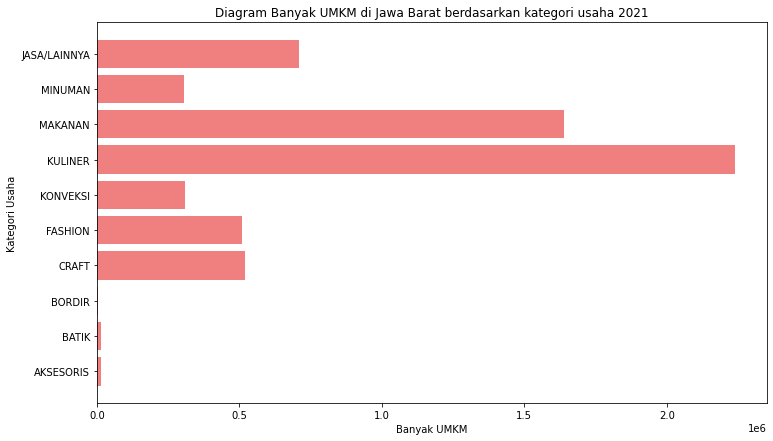

In [29]:
# Perbandingan banyak UMKM berdasarkan kategori usaha pada tahun 2021
umkm_2021 = umkm.loc[umkm['tahun']==2021]
banyak_umkm_2021_jenis_usaha =[]
for i in umkm['kategori_usaha'].unique():
    banyak_umkm_2021_jenis_usaha.append(umkm_2021.loc[umkm_2021['kategori_usaha']==i].jumlah_umkm.sum())
plt.figure(figsize=(12,7))
plt.barh(umkm['kategori_usaha'].unique(),banyak_umkm_2021_jenis_usaha , color='lightcoral')
plt.title('Diagram Banyak UMKM di Jawa Barat berdasarkan kategori usaha 2021')
plt.ylabel('Kategori Usaha')
plt.xlabel('Banyak UMKM')
plt.show()

In [30]:
# Menampilkan hasil dalam bentuk tabel
table_jawa_barat_2021 = {'Kategori Usaha':umkm['kategori_usaha'].unique(),
                    'Banyak UMKM': ['{:,}'.format(i) for i in banyak_umkm_2021_jenis_usaha]}
print(tabulate(table_jawa_barat_2021, headers='keys', tablefmt='fancy_grid'))

╒══════════════════╤═══════════════╕
│ Kategori Usaha   │ Banyak UMKM   │
╞══════════════════╪═══════════════╡
│ AKSESORIS        │ 14,563        │
├──────────────────┼───────────────┤
│ BATIK            │ 14,563        │
├──────────────────┼───────────────┤
│ BORDIR           │ 2,081         │
├──────────────────┼───────────────┤
│ CRAFT            │ 520,235       │
├──────────────────┼───────────────┤
│ FASHION          │ 507,749       │
├──────────────────┼───────────────┤
│ KONVEKSI         │ 310,060       │
├──────────────────┼───────────────┤
│ KULINER          │ 2,239,089     │
├──────────────────┼───────────────┤
│ MAKANAN          │ 1,637,699     │
├──────────────────┼───────────────┤
│ MINUMAN          │ 303,820       │
├──────────────────┼───────────────┤
│ JASA/LAINNYA     │ 707,519       │
╘══════════════════╧═══════════════╛


In [31]:
umkm_2021.loc[umkm_2021['nama_kabupaten_kota']=='KABUPATEN BOGOR'].jumlah_umkm.sum()

506347

Mari kita lihat berapa banyak UMKM yang ada di Kota Bogor dari tahun 2017 - 2021

In [32]:
banyak_umkm_jawa_barat

[4921572, 5226081, 5549426, 5892787, 6257378]

In [33]:
# Mengatahui tahun yang ada di dataset
tahun = umkm['tahun'].unique()
# List untuk menyimpan banyaknya UMKM pada masing-masing tahun
banyak_umkm_kota_bogor = []
# Looping untuk mengetahui banyaknya UMKM pada masing-masing tahun dan nilainya di input ke list banyak_umkm
for t in tahun:
    kota_bogor = umkm.loc[(umkm['nama_kabupaten_kota']=='KOTA BOGOR')&(umkm['tahun']==t)]
    jumlah_kota_bogor = kota_bogor['jumlah_umkm'].sum()
    banyak_umkm_kota_bogor.append(jumlah_kota_bogor)

# Menampilkan hasil dalam bentuk tabel
table_kota_bogor = {'Tahun':tahun,
                    'Banyak UMKM': ['{:,}'.format(i) for i in banyak_umkm_kota_bogor]}
print(tabulate(table_kota_bogor, headers='keys', tablefmt='fancy_grid'))

╒═════════╤═══════════════╕
│   Tahun │ Banyak UMKM   │
╞═════════╪═══════════════╡
│    2017 │ 91,753        │
├─────────┼───────────────┤
│    2018 │ 97,429        │
├─────────┼───────────────┤
│    2019 │ 103,456       │
├─────────┼───────────────┤
│    2020 │ 109,860       │
├─────────┼───────────────┤
│    2021 │ 116,656       │
╘═════════╧═══════════════╛


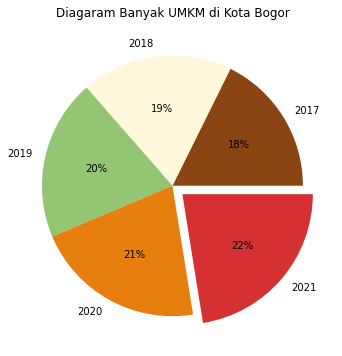

In [34]:
# Plot untuk membandingkan jumlah UMKM di Kota Bogor daru tahun 2017 - 2021
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#D53032')
plt.figure(figsize=(6,6))
plt.pie(banyak_umkm_kota_bogor, labels = tahun, autopct='%1.0f%%', colors=colors, explode=(0, 0, 0, 0, 0.1))
plt.title('Diagaram Banyak UMKM di Kota Bogor')
plt.show()

In [35]:
# Persentasi pertumbuhan UMKM di Kota Bogor dari tahun 2017-2021
persen_kota_bogor = ((banyak_umkm_kota_bogor[4]-banyak_umkm_kota_bogor[0])/banyak_umkm_kota_bogor[0]) * 100
print('Pertumbuhan UMKM di Kota Bogor adalah','{:.2f}'.format(persen_kota_bogor),'% sejak 2017')

Pertumbuhan UMKM di Kota Bogor adalah 27.14 % sejak 2017


Mari kita lihat perbandingan banyak UMKM di Kota Bogor bedasarkan kategori usaha tiap tahun 2021

In [36]:
# Memfokuskon dataset pada kota bogor dan tahun 2021
kota_bogor_2021 = umkm.loc[(umkm['nama_kabupaten_kota']=='KOTA BOGOR')&(umkm['tahun']==2021)]

# Dataset diurutkan menurun berdasarkan jumlah umkm dari kategori usaha
kota_bogor_2021.sort_values(['jumlah_umkm'],ascending=False)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
1266,1267,32,JAWA BARAT,3271,KOTA BOGOR,KULINER,41743,UNIT,2021
1267,1268,32,JAWA BARAT,3271,KOTA BOGOR,MAKANAN,30531,UNIT,2021
1269,1270,32,JAWA BARAT,3271,KOTA BOGOR,JASA/LAINNYA,13190,UNIT,2021
1263,1264,32,JAWA BARAT,3271,KOTA BOGOR,CRAFT,9699,UNIT,2021
1264,1265,32,JAWA BARAT,3271,KOTA BOGOR,FASHION,9466,UNIT,2021
1265,1266,32,JAWA BARAT,3271,KOTA BOGOR,KONVEKSI,5780,UNIT,2021
1268,1269,32,JAWA BARAT,3271,KOTA BOGOR,MINUMAN,5664,UNIT,2021
1260,1261,32,JAWA BARAT,3271,KOTA BOGOR,AKSESORIS,272,UNIT,2021
1261,1262,32,JAWA BARAT,3271,KOTA BOGOR,BATIK,272,UNIT,2021
1262,1263,32,JAWA BARAT,3271,KOTA BOGOR,BORDIR,39,UNIT,2021


Dapat dilihat pada tabel di atas, bahwa jenis UMKM tertinggi di Kota Bogor tahun 2021 adalah KULINER dan jenis UMKM terendah adalah BORDIR

<AxesSubplot: xlabel='Banyak UMKM', ylabel='Kategori Usaha'>

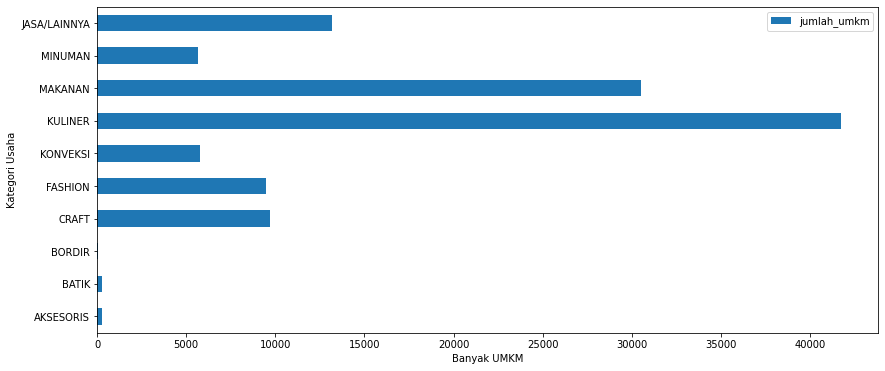

In [37]:
# Diagram untuk melihat banyak UMKM di Kota Bogor tahun 2021 berdasarkan kategori usaha
kota_bogor_2021.plot(kind='barh', y='jumlah_umkm', x='kategori_usaha',
figsize=(14,6), ylabel='Kategori Usaha', xlabel='Banyak UMKM',rot=False)